In [1]:
from langgraph.graph import StateGraph, START, END
from typing import Literal
import random 
from IPython.display import Image, display
from typing_extensions import TypedDict

In [2]:
class State(TypedDict):
    graph_state: str

In [3]:
# Will be used as conditional edge 
def decide_mood(state : State) -> Literal["happy", "sad"]:
    # Here, let's just do a 50 / 50 split between nodes 2, 3
    if random.random() < 0.5:
        # 50% of the time, we return Node 2
        return "happy"
    
    # 50% of the time, we return Node 3
    return "sad"

In [4]:
def node_1(state):
    print("---Node 1---")
    return {"graph_state": state['graph_state'] +" I am"}

def node_2(state):
    print("---Node 2---")
    return {"graph_state": state['graph_state'] +" happy!"}

def node_3(state):
    print("---Node 3---")
    return {"graph_state": state['graph_state'] +" sad!"}


In [5]:
# Build graph
builder = StateGraph(State)
builder.add_node("node_1", node_1)
builder.add_node("happy", node_2)
builder.add_node("sad", node_3)

In [6]:
# Configure the flow of nodes
builder.add_edge(START, "node_1")
builder.add_conditional_edges("node_1", decide_mood)
builder.add_edge("happy", END)
builder.add_edge("sad", END)

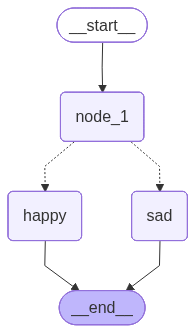

In [7]:
# create graph
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))


In [15]:
result = graph.invoke({"graph_state" : "Hi, this is Srikanth."})
print(result)

---Node 1---
---Node 3---
{'graph_state': 'Hi, this is Srikanth. I am sad!'}
